In [1]:
!git clone https://github.com/Nakamo312/ParallelProgrammingLab2.git

Cloning into 'ParallelProgrammingLab2'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 22 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 312.26 KiB | 2.84 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
!apt-get install build-essential
!apt-get install openmpi-bin libopenmpi-dev
!sudo apt install libopenmpi-dev openmpi-bin


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libopenmpi-dev is already the newest version (4.1.2-2ubuntu1).
openmpi-bin is already the newest version (4.1.2-2ubuntu1).
openmpi-bin set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libopenmpi-dev is already the newest version (4.1.2-2ubuntu1).
openmpi-bin is already the newest version (4.1.2-2ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [4]:
!find /usr -name mpi.h

/usr/src/linux-headers-5.15.0-139/include/linux/mpi.h
/usr/include/mumps_seq/mpi.h
/usr/lib/x86_64-linux-gnu/fortran/gfortran-mod-15/openmpi/mpi.h
/usr/lib/x86_64-linux-gnu/openmpi/include/mpi.h


In [6]:
!nvcc -I/usr/lib/x86_64-linux-gnu/openmpi/include \
      -L/usr/lib/x86_64-linux-gnu/openmpi/lib \
      -Xcompiler -fopenmp \
      ParallelProgrammingLab2/matric_calc.cu \
      -o matrix_mult \
      -lmpi -lstdc++

In [12]:
!find /content -name "benchmark.sh"
! chmod +x ParallelProgrammingLab2/benchmark.sh
!ParallelProgrammingLab2/benchmark.sh  --sizes "100 200 300 400 500 600 700 800 900 1000 2000 3000 4000" --mode cuda --blocks "1 2 4 8 16 32 64 128"

/content/ParallelProgrammingLab2/benchmark.sh
Processing size: 100x100
Matrix A (100x100) saved to ParallelProgrammingLab2/mat1.bin
Matrix B (100x100) saved to ParallelProgrammingLab2/mat2.bin
  CUDA block size: 1x1... OK (0ms)
  CUDA block size: 2x2... OK (1ms)
  CUDA block size: 4x4... OK (1ms)
  CUDA block size: 8x8... OK (1ms)
  CUDA block size: 16x16... OK (1ms)
  CUDA block size: 32x32... OK (1ms)
  CUDA block size: 64x64... OK (1ms)
  CUDA block size: 128x128... OK (0ms)
Processing size: 200x200
Matrix A (200x200) saved to ParallelProgrammingLab2/mat1.bin
Matrix B (200x200) saved to ParallelProgrammingLab2/mat2.bin
  CUDA block size: 1x1... OK (2ms)
  CUDA block size: 2x2... OK (2ms)
  CUDA block size: 4x4... OK (2ms)
  CUDA block size: 8x8... OK (2ms)
  CUDA block size: 16x16... OK (2ms)
  CUDA block size: 32x32... OK (2ms)
  CUDA block size: 64x64... OK (2ms)
  CUDA block size: 128x128... OK (2ms)
Processing size: 300x300
Matrix A (300x300) saved to ParallelProgrammingLab2/mat

In [13]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [15]:

df = pd.read_csv('ParallelProgrammingLab2/results.csv')
display(df.head())

,size,param,time,gflops
0,100,1,0,inf
1,100,2,1,2.0
2,100,4,1,2.0
3,100,8,1,2.0
4,100,16,1,2.0


In [17]:

df = df.rename(columns={
    'param': 'block',
    'time': 'computation_time'
})


df['time_ms'] = df['computation_time'] * 1000

if 'block' in str(df.columns):
    mode = 'CUDA'
    x_label = 'Block Size'
elif 'threads' in df.columns:
    mode = 'Parallel'
    x_label = 'Threads'
else:
    mode = 'Serial'
    x_label = 'Parameters'

print(f"Detected mode: {mode}")

Detected mode: CUDA


In [19]:

time_pivot = df.pivot_table(
    index='size',
    columns='block' if 'block' in df.columns else 'threads',
    values='time_ms',
    aggfunc='median'
)

if 'validation' in df.columns:
    validation_pivot = df.pivot_table(
        index='dimension',
        columns='parameter' if 'parameter' in df.columns else 'threads',
        values='validation',
        aggfunc='all'
    )
    mask = ~validation_pivot
else:
    mask = None

display(time_pivot)

block,1,2,4,8,16,32,64,128
size,,,,,,,,
100,0.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,0.0
200,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
300,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
400,9000.0,10000.0,9000.0,9000.0,9000.0,10000.0,9000.0,9000.0
500,21000.0,21000.0,20000.0,29000.0,19000.0,14000.0,14000.0,14000.0
600,20000.0,20000.0,21000.0,20000.0,21000.0,20000.0,20000.0,20000.0
700,27000.0,28000.0,27000.0,27000.0,30000.0,28000.0,29000.0,27000.0
800,36000.0,37000.0,37000.0,35000.0,36000.0,56000.0,53000.0,49000.0
900,44000.0,45000.0,45000.0,57000.0,44000.0,44000.0,44000.0,44000.0


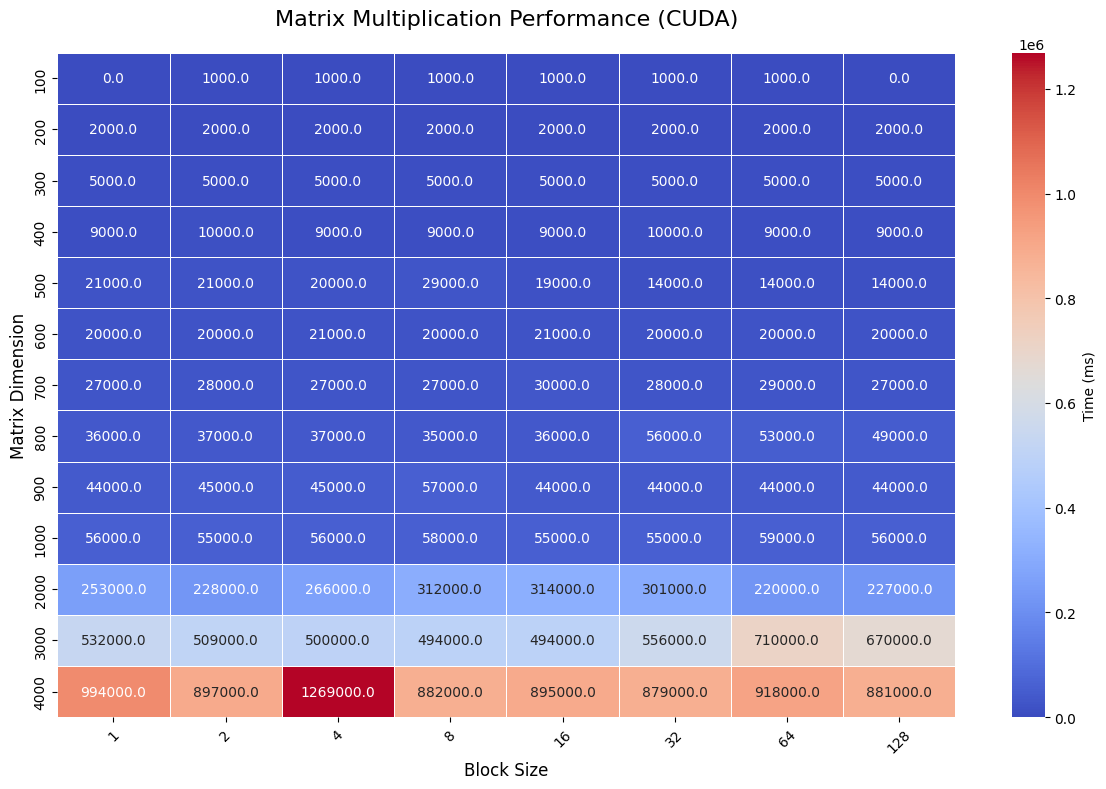

In [20]:

plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    time_pivot,
    annot=True,
    fmt=".1f",
    cmap="coolwarm",
    linewidths=0.5,
    mask=mask,
    cbar_kws={'label': 'Time (ms)'}
)

plt.title(f'Matrix Multiplication Performance ({mode})', fontsize=16, pad=20)
plt.xlabel(x_label, fontsize=12)
plt.ylabel('Matrix Dimension', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('performance_heatmap.png', dpi=300)
plt.show()

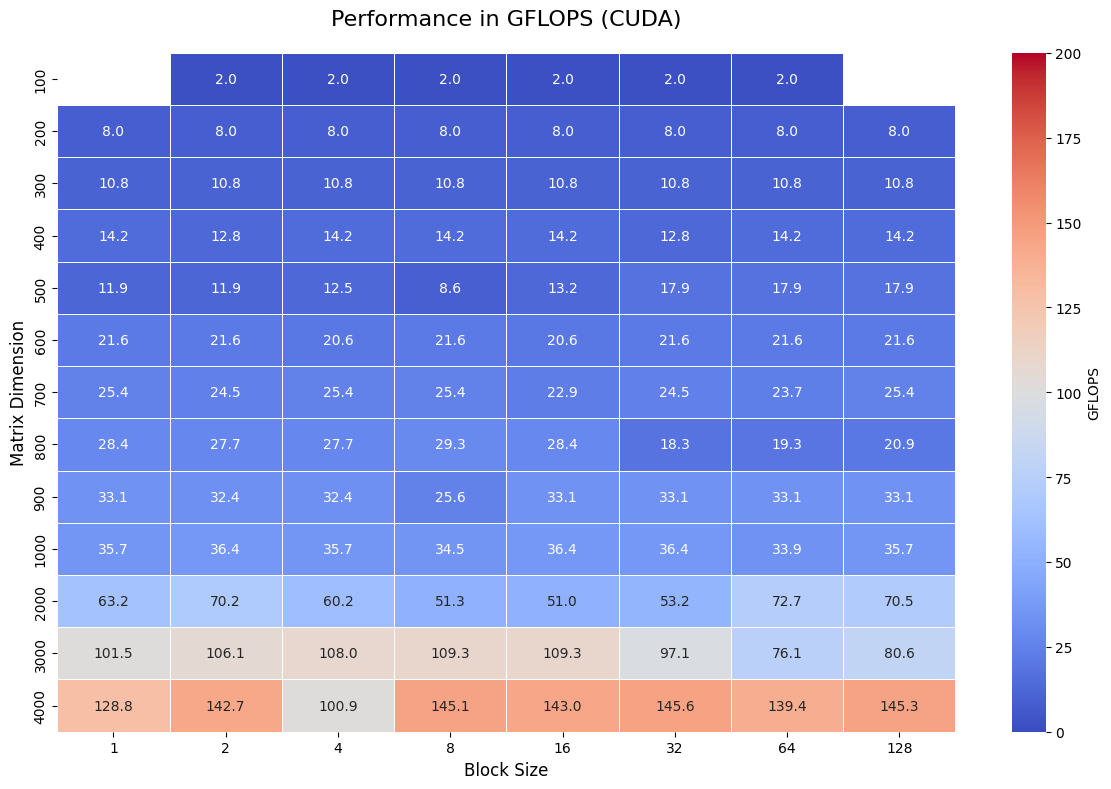

In [28]:

if 'gflops' in df.columns:
    plt.figure(figsize=(12, 8))
    gflops_pivot = df.pivot_table(
        index='size',
        columns='block' if 'block' in df.columns else 'threads',
        values='gflops',
        aggfunc='median'
    )

    sns.heatmap(
        gflops_pivot,
        annot=True,
        fmt=".1f",
        cmap="coolwarm",
        linewidths=0.5,
        vmin=0.0,
        vmax=200,
        cbar_kws={'label': 'GFLOPS'}
    )

    plt.title(f'Performance in GFLOPS ({mode})', fontsize=16, pad=20)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel('Matrix Dimension', fontsize=12)
    plt.tight_layout()
    plt.savefig('gflops_heatmap.png', dpi=300)
    plt.show()